In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report ,ConfusionMatrixDisplay

**Importing the dataset**

In [157]:
#Given dataset is in .txt format, so in order to convert it into dataframe use delimiter to split and header=None.

train_df=pd.read_csv('/content/drive/MyDrive/Guvi_collab/trainKNN.txt',sep=",", header=None,names=['id','ri','na','mg','al','si',
                                                                                                   'k','ca','ba','fe','type'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      196 non-null    int64  
 1   ri      196 non-null    float64
 2   na      196 non-null    float64
 3   mg      196 non-null    float64
 4   al      196 non-null    float64
 5   si      196 non-null    float64
 6   k       196 non-null    float64
 7   ca      196 non-null    float64
 8   ba      196 non-null    float64
 9   fe      196 non-null    float64
 10  type    196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [158]:
test_df=pd.read_csv('/content/drive/MyDrive/Guvi_collab/testKNN.txt',sep=",", header=None,names=['id','ri','na','mg','al','si',
                                                                                                   'k','ca','ba','fe','type'])
test_df.head(5) 

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


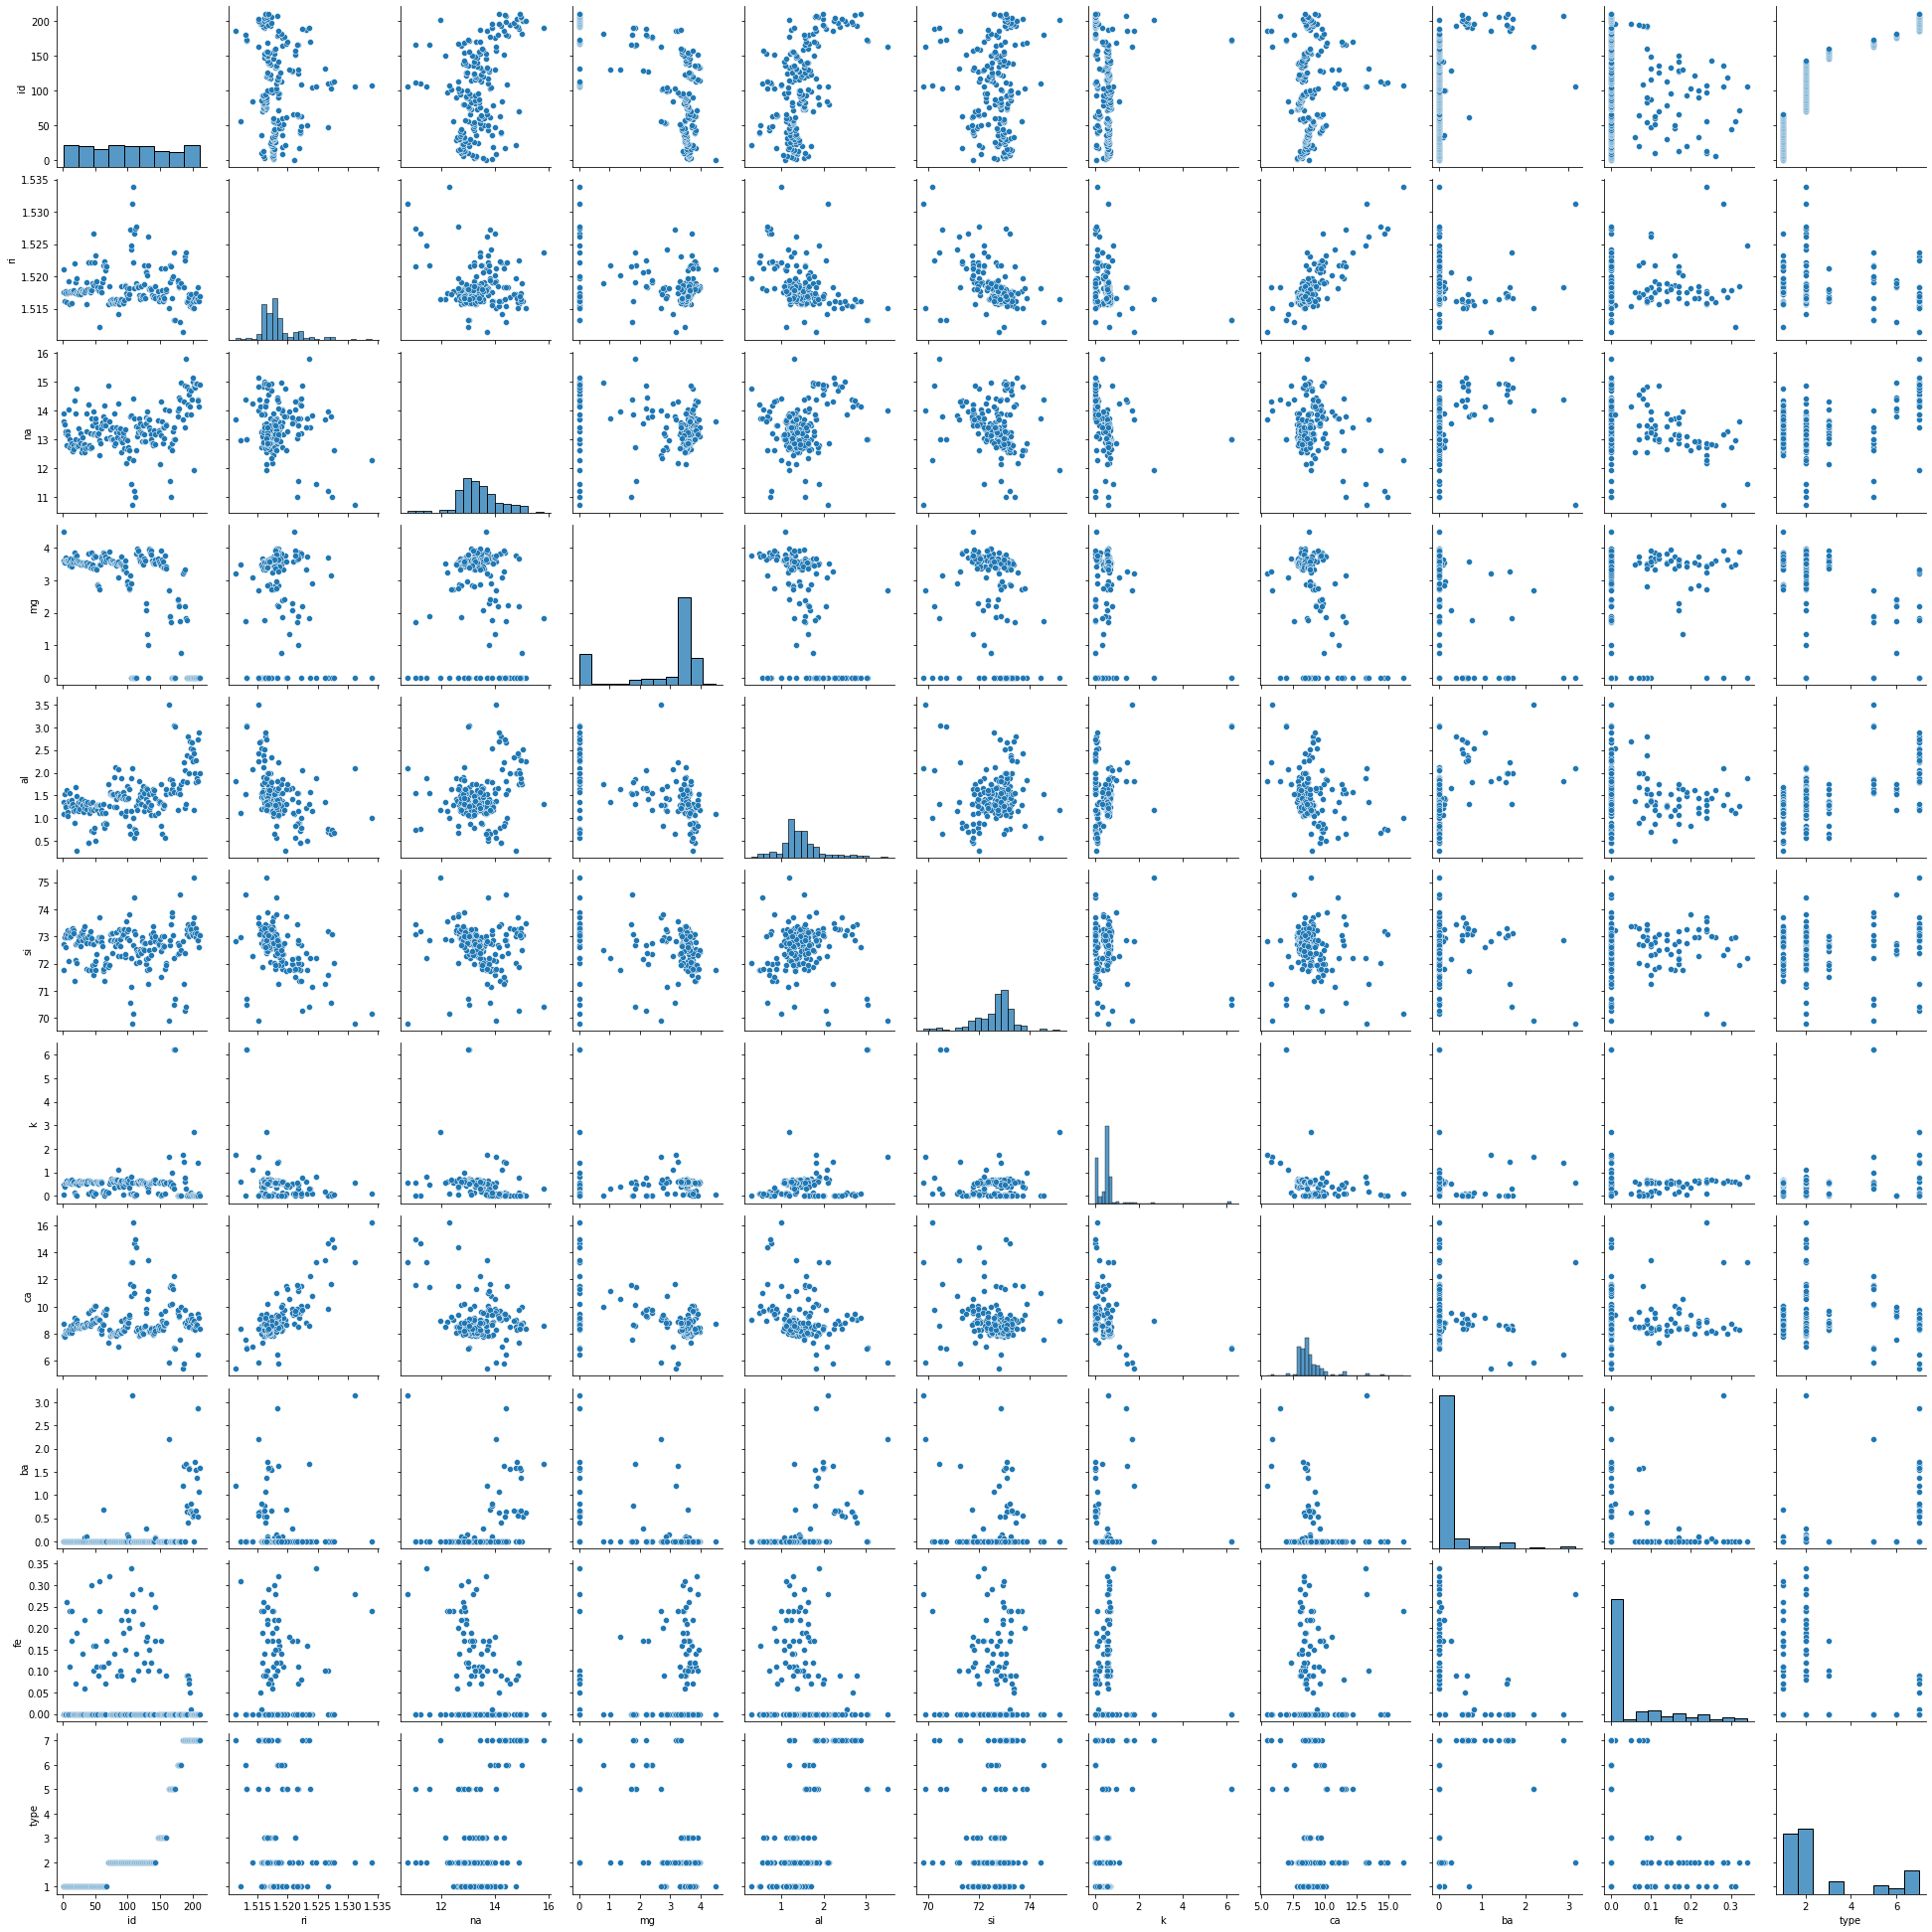

In [5]:
sns.pairplot(train_df) #analysing the correlation between variables using the pairplot 

In [4]:
train_df.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [159]:
#Using standard scaler to normalize the data
sts=StandardScaler()
for column in ['ri','na','mg','al','si','k','ca','ba','fe']:
  train_df[column]=sts.fit_transform(train_df[[column]])
  test_df[column]=sts.fit_transform(test_df[[column]])


In [160]:
x=train_df.drop(['id','type'],axis=1)
y=train_df['type']
x_test=test_df.drop(['id','type'],axis=1)
y_test=test_df['type']

In [176]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean') #Fitting model using euclidean distance method
knn.fit(x,y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [185]:
knn.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [177]:
predicted_train=knn.predict(x)
print(classification_report(y,predicted_train))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        67
           2       0.91      0.88      0.90        73
           3       0.67      0.29      0.40        14
           5       0.80      0.80      0.80        10
           6       1.00      0.83      0.91         6
           7       0.96      0.88      0.92        26

    accuracy                           0.85       196
   macro avg       0.85      0.77      0.80       196
weighted avg       0.85      0.85      0.84       196



In [178]:
predicted_test=knn.predict(x_test)
print(classification_report(y_test,predicted_test))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.43      1.00      0.60         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.67        18
   macro avg       0.65      0.67      0.60        18
weighted avg       0.65      0.67      0.60        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Accuracy = 0.67**

In [182]:
knn1=KNeighborsClassifier(n_neighbors=3, metric='manhattan') #Fitting model using manhattan distance method
knn1.fit(x,y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [183]:
predicted_train1=knn1.predict(x)
print(classification_report(y,predicted_train1))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        67
           2       0.94      0.88      0.91        73
           3       0.62      0.36      0.45        14
           5       0.80      0.80      0.80        10
           6       1.00      0.83      0.91         6
           7       0.96      0.88      0.92        26

    accuracy                           0.86       196
   macro avg       0.85      0.78      0.81       196
weighted avg       0.86      0.86      0.85       196



In [184]:
predicted_test1=knn1.predict(x_test)
print(classification_report(y_test,predicted_test1))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy                           0.56        18
   macro avg       0.61      0.56      0.53        18
weighted avg       0.61      0.56      0.53        18



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Accuracy = 0.56** 


The square equilidean distance is more accurate than using manhattan distance 
method. 

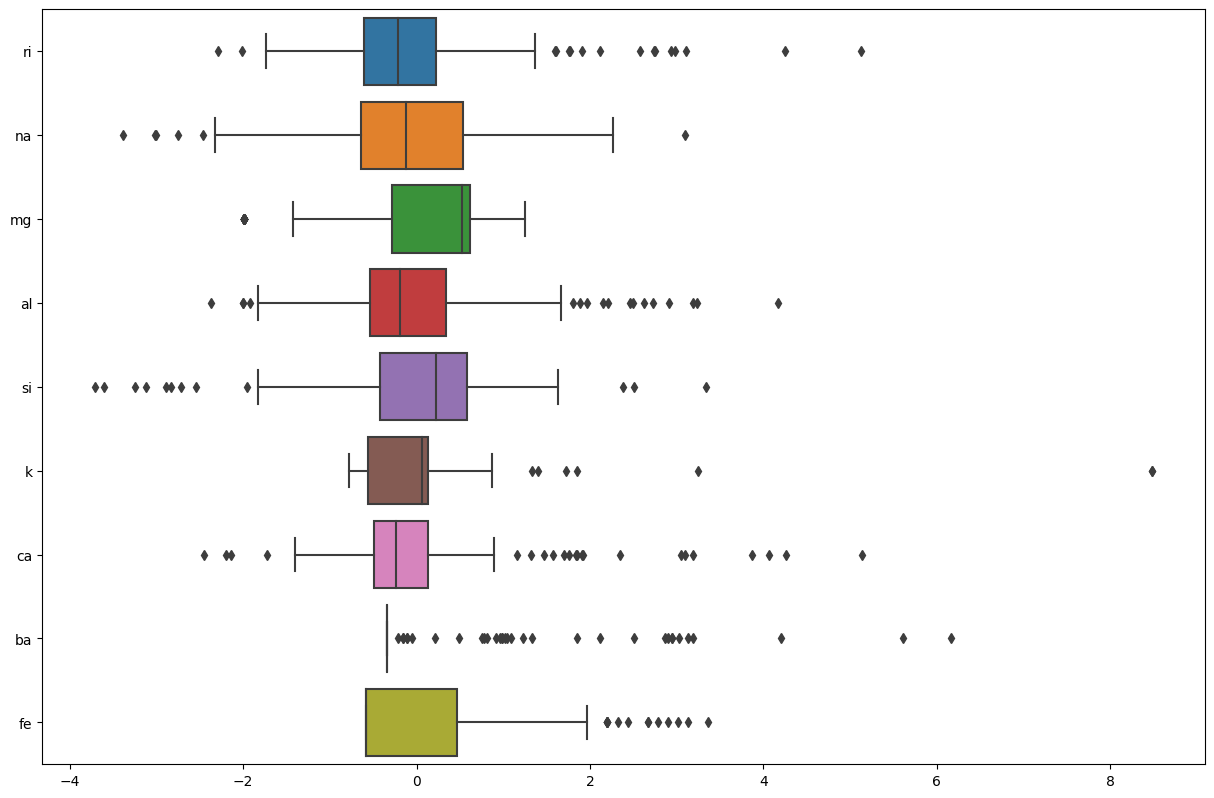

In [27]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
sns.boxplot(data=train_df[['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']], orient="h",ax=ax)